Проверка картинок из магистерской презентации

In [1]:
import sys 
sys.path.insert(1, '../')

In [2]:
import os
import pylab as plt
import numpy as np
from matplotlib import rcParams
from tqdm import tqdm

from Models.Higgins1D.Higgins1DConfiguration import Higgins1DConfiguration, Higgins1DTdmaParameters
from Models.Higgins1D.Higgins1DTdmaSolver import integrate_tdma_implicit_scheme
from MathHelpers.InitDataHelpers import get_cos, get_normal_rand

from Drawing.DrawHiggins1D import draw_amps_stat, draw_transient, draw_timeline_deltas
from Drawing.DrawHelper import set_defaults_1D

In [3]:
base_dir = 'D:\\math\\data14_11_2020_mko'
set_defaults_1D()

### Про допустимый шаг по времени

In [4]:
results = {}
for dt in tqdm([0.2,0.1,0.05, 0.025, 0.0125, 0.00625]):
    conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
    u_init = get_cos(1, 200,1.0, 0.1)
    v_init = get_cos(1, 200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.2, dt, 5000.0, save_timeline=True, timeline_save_step_delta=1)
    results[dt] = integrate_tdma_implicit_scheme(conf, params)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  2.88s/it]


In [4]:

def draw_sas(res, left_border=None, right_border=None,w = 2, h = 3):
    fig, axes = plt.subplots(w,h, figsize=(30,15))
    for i,k in enumerate(res):
        draw_transient(res[k],ax=axes[i//h][i%h], left_border=left_border, right_border=right_border)
    fig.suptitle(f"$p={res[k].model_config['p']}, q={res[k].model_config['q']}, D_u={res[k].model_config['Du']}, t \in [{left_border}, {right_border}]$")
    plt.show()

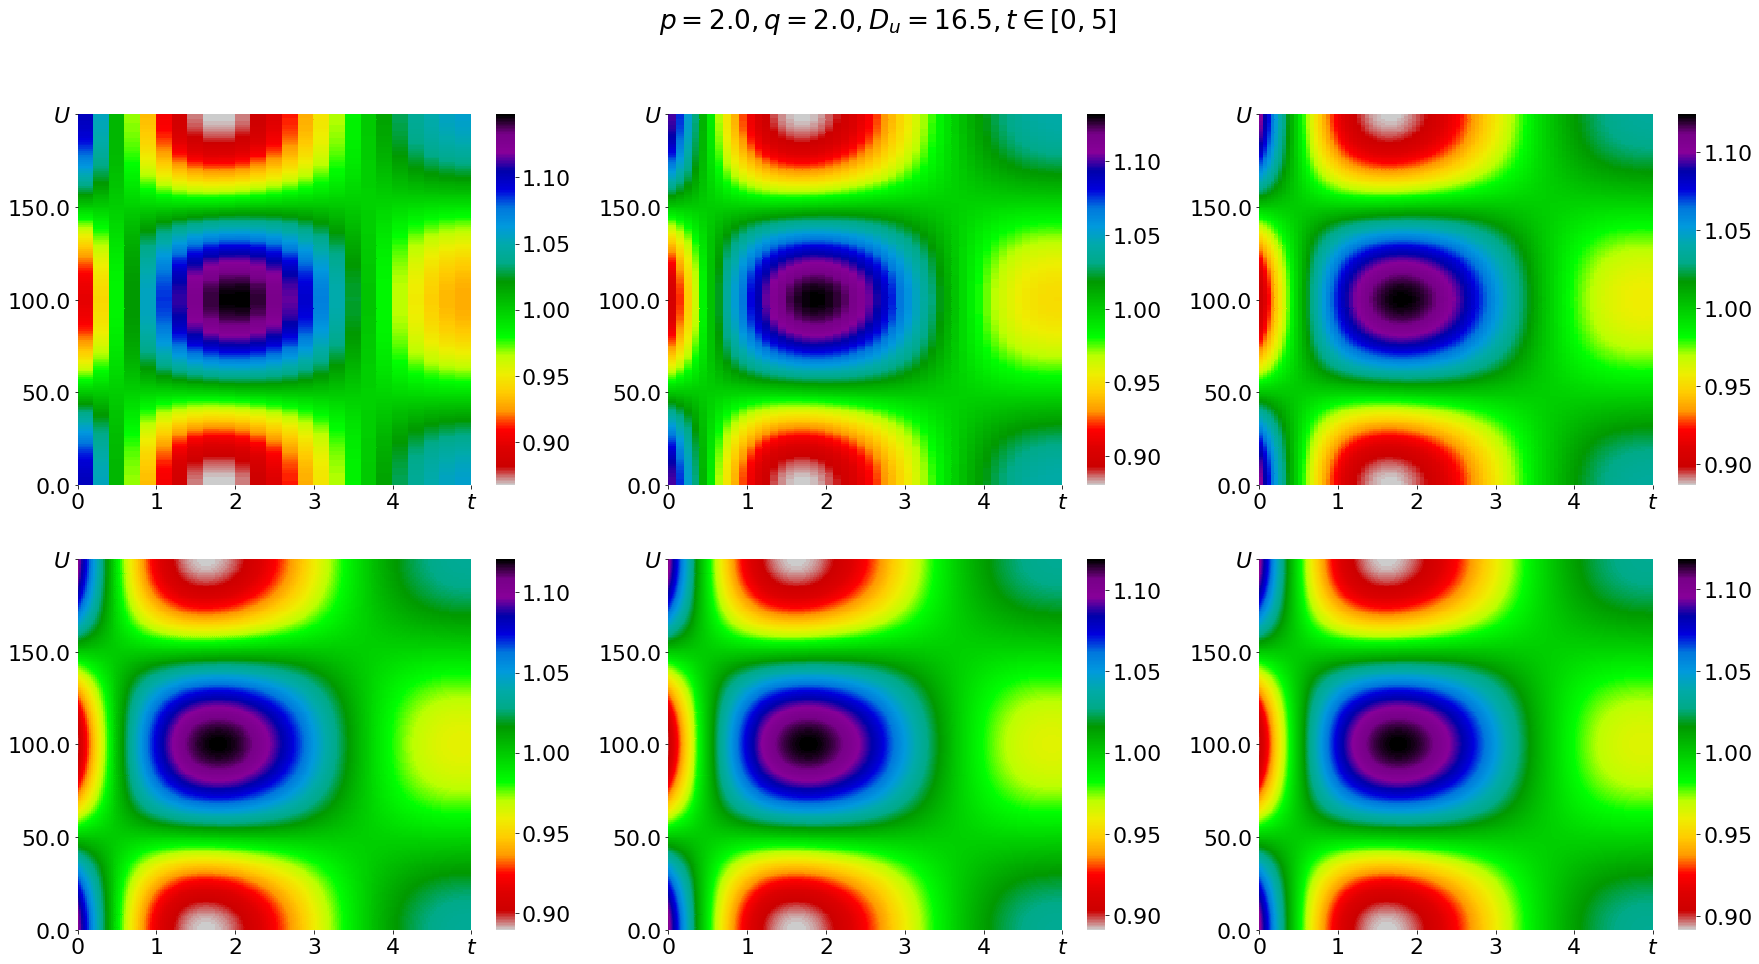

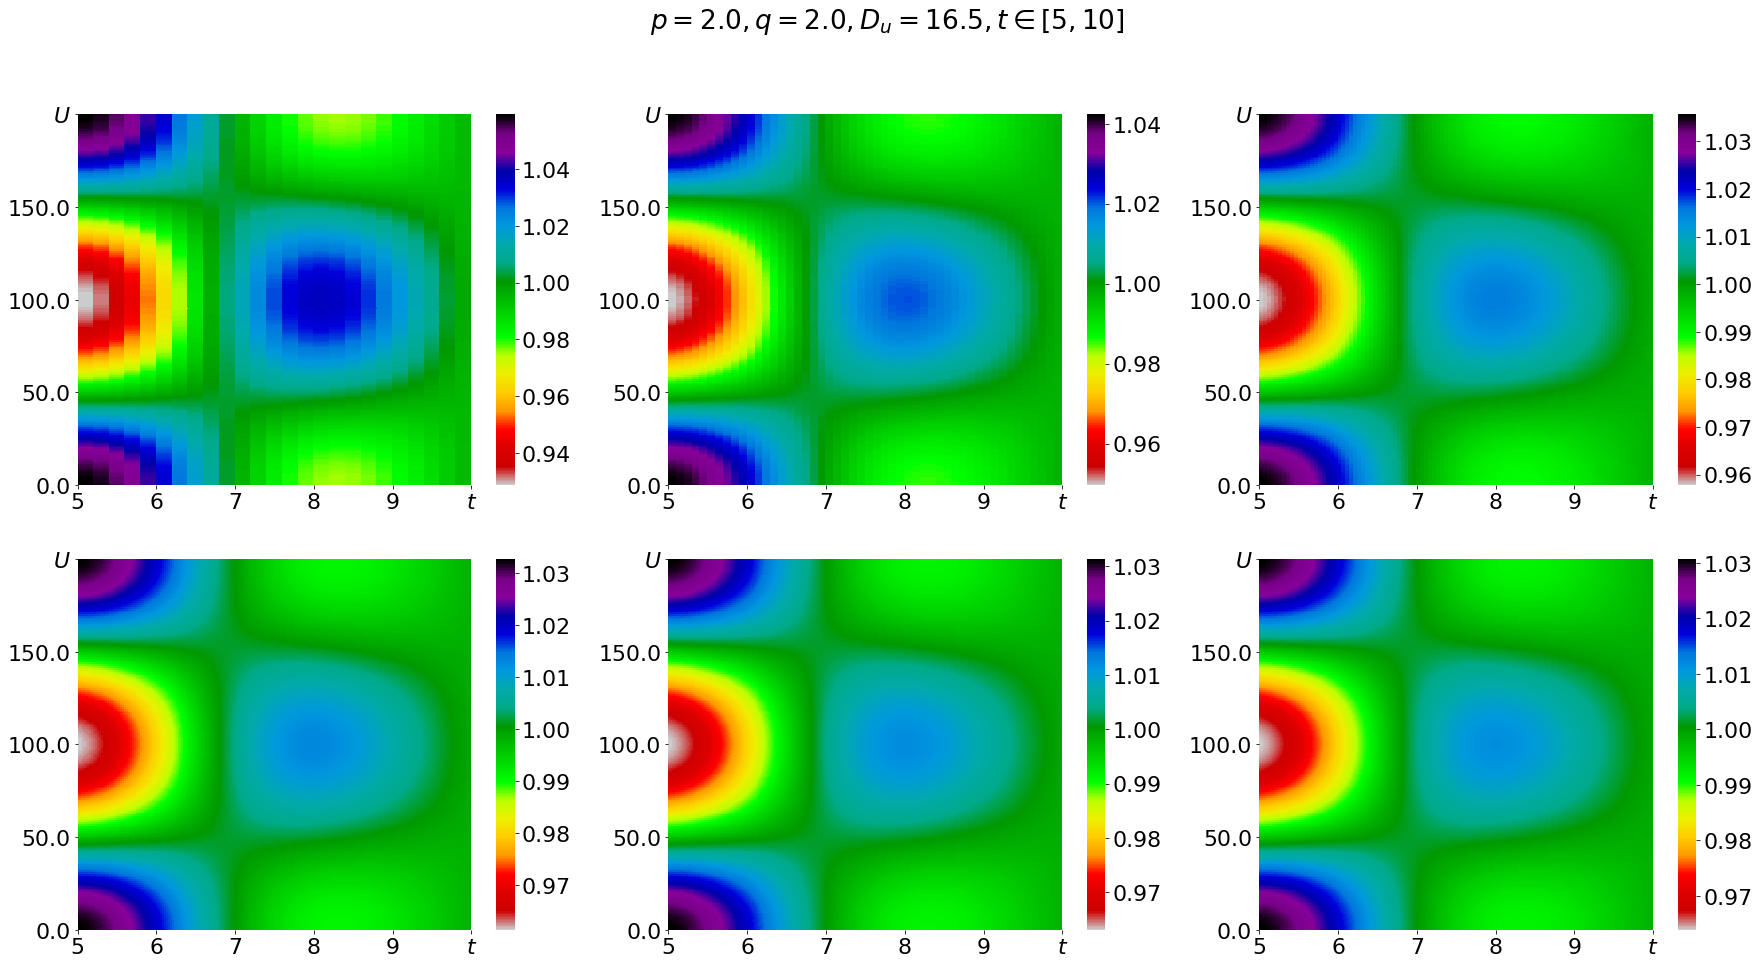

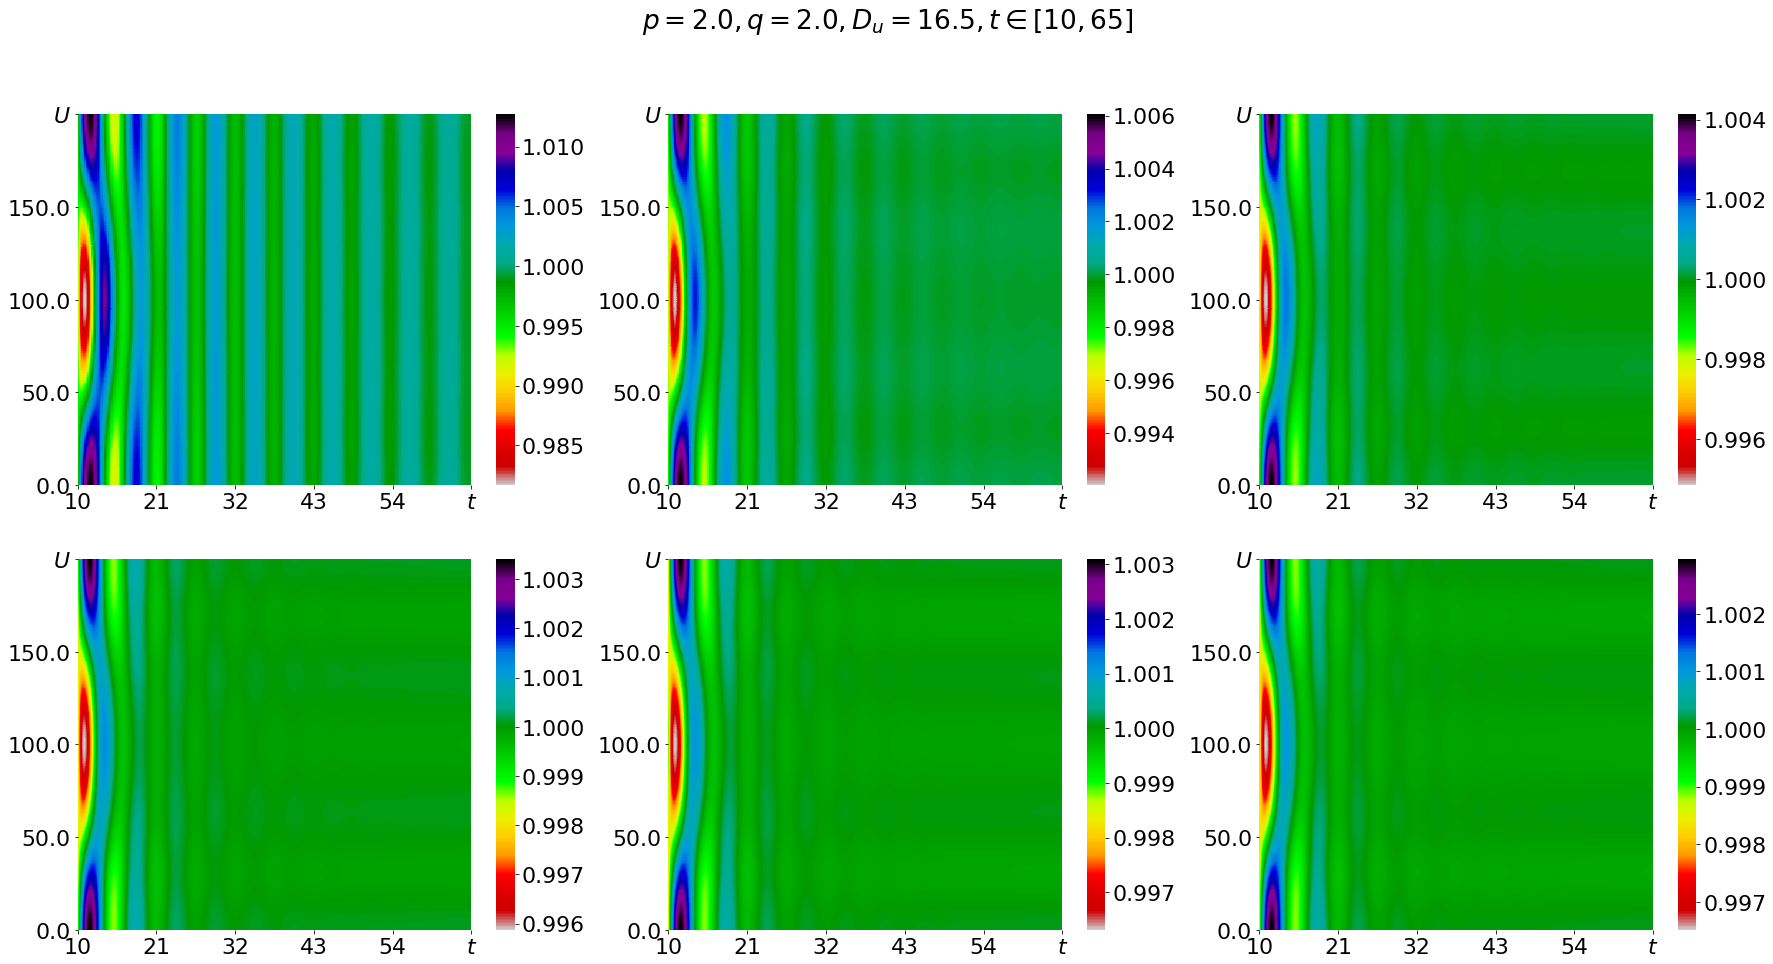

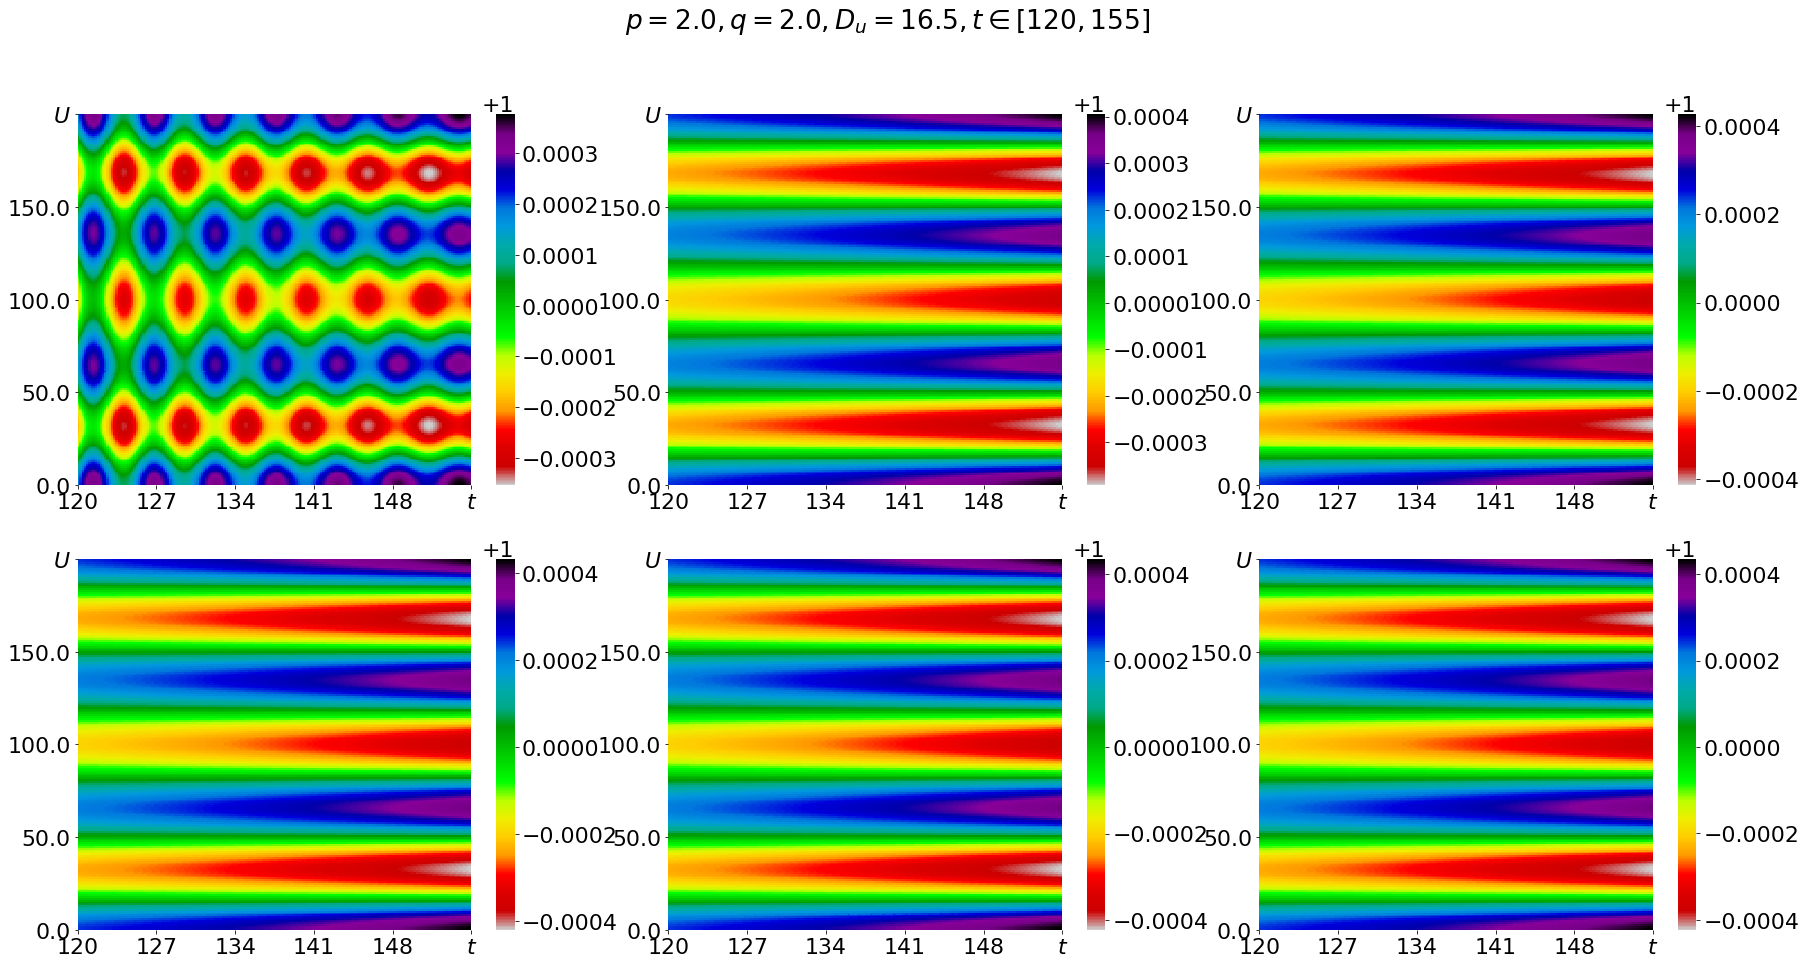

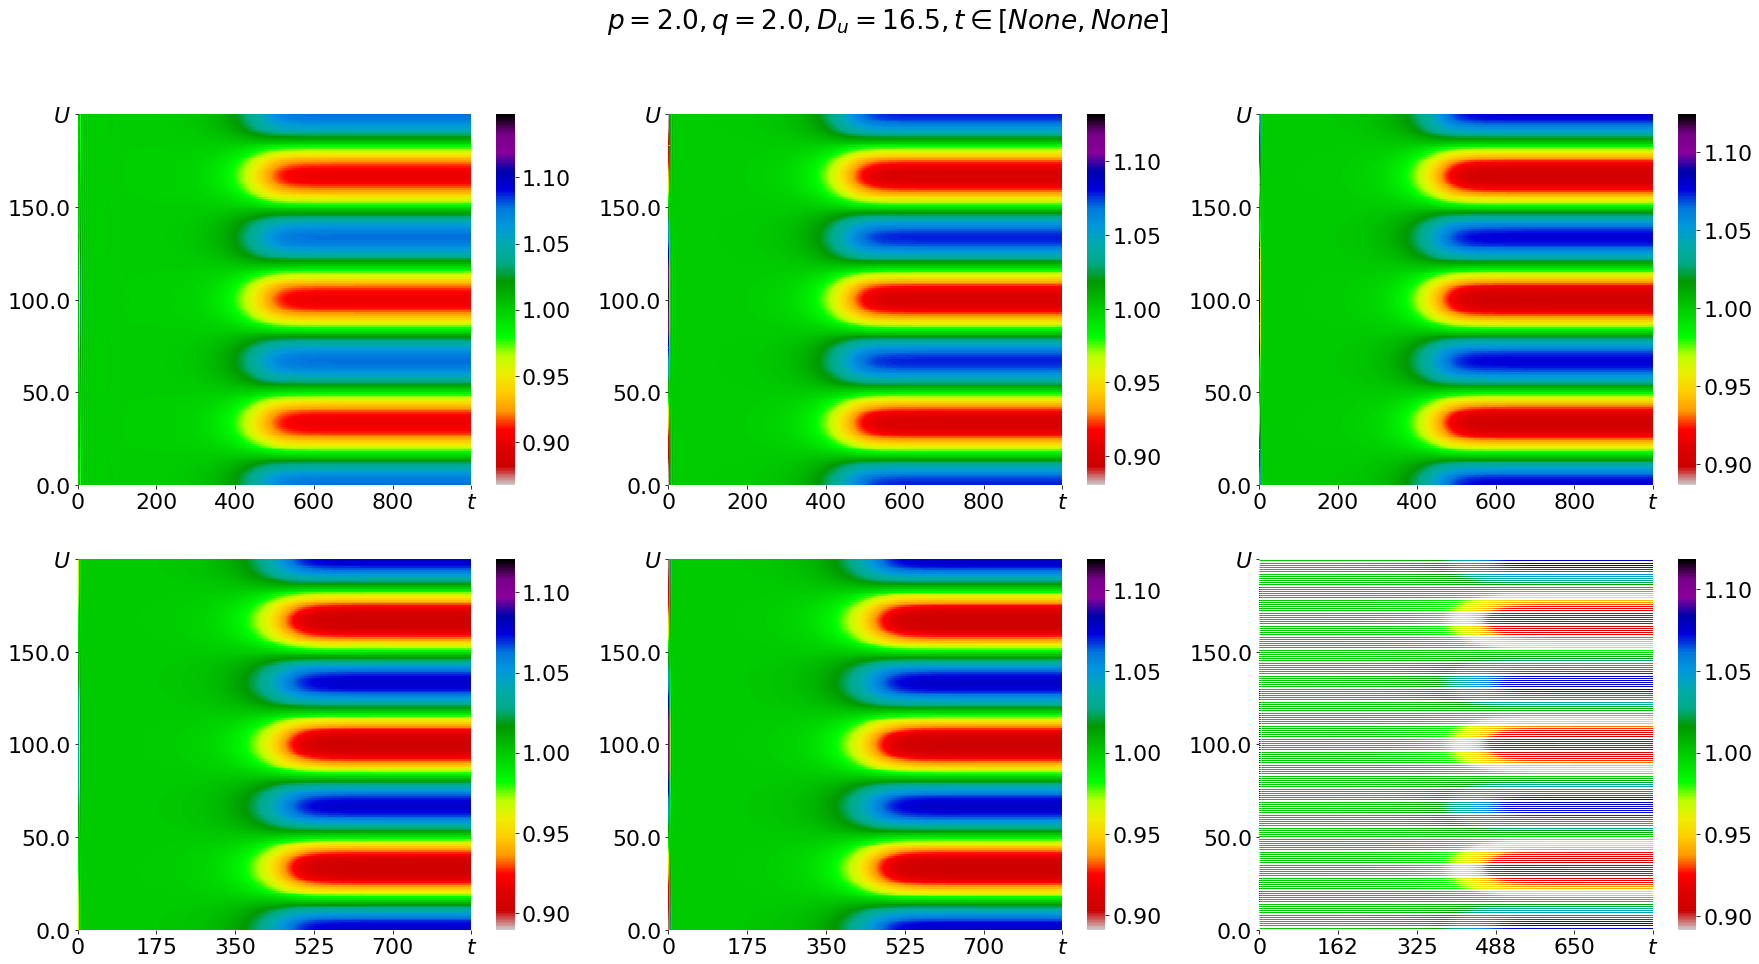

In [6]:
draw_sas(results, left_border=0, right_border=5)
draw_sas(results, left_border=5, right_border=10)
draw_sas(results, left_border=10, right_border=65)
draw_sas(results, left_border=120, right_border=155)
draw_sas(results)


In [7]:
results_1 = {}
for dt in tqdm([0.2,0.1,0.05, 0.025, 0.0125, 0.00625]):
    conf = Higgins1DConfiguration(1.0, 0.2, 10, 1)
    u_init = get_cos(1, 200,1.0, 0.1)
    v_init = get_cos(1, 200,1.0, 0.1)
    params = Higgins1DTdmaParameters(u_init, v_init, 0.2, dt, 5000.0, save_timeline=True, timeline_save_step_delta=1)
    results_1[dt] = integrate_tdma_implicit_scheme(conf, params)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.08s/it]


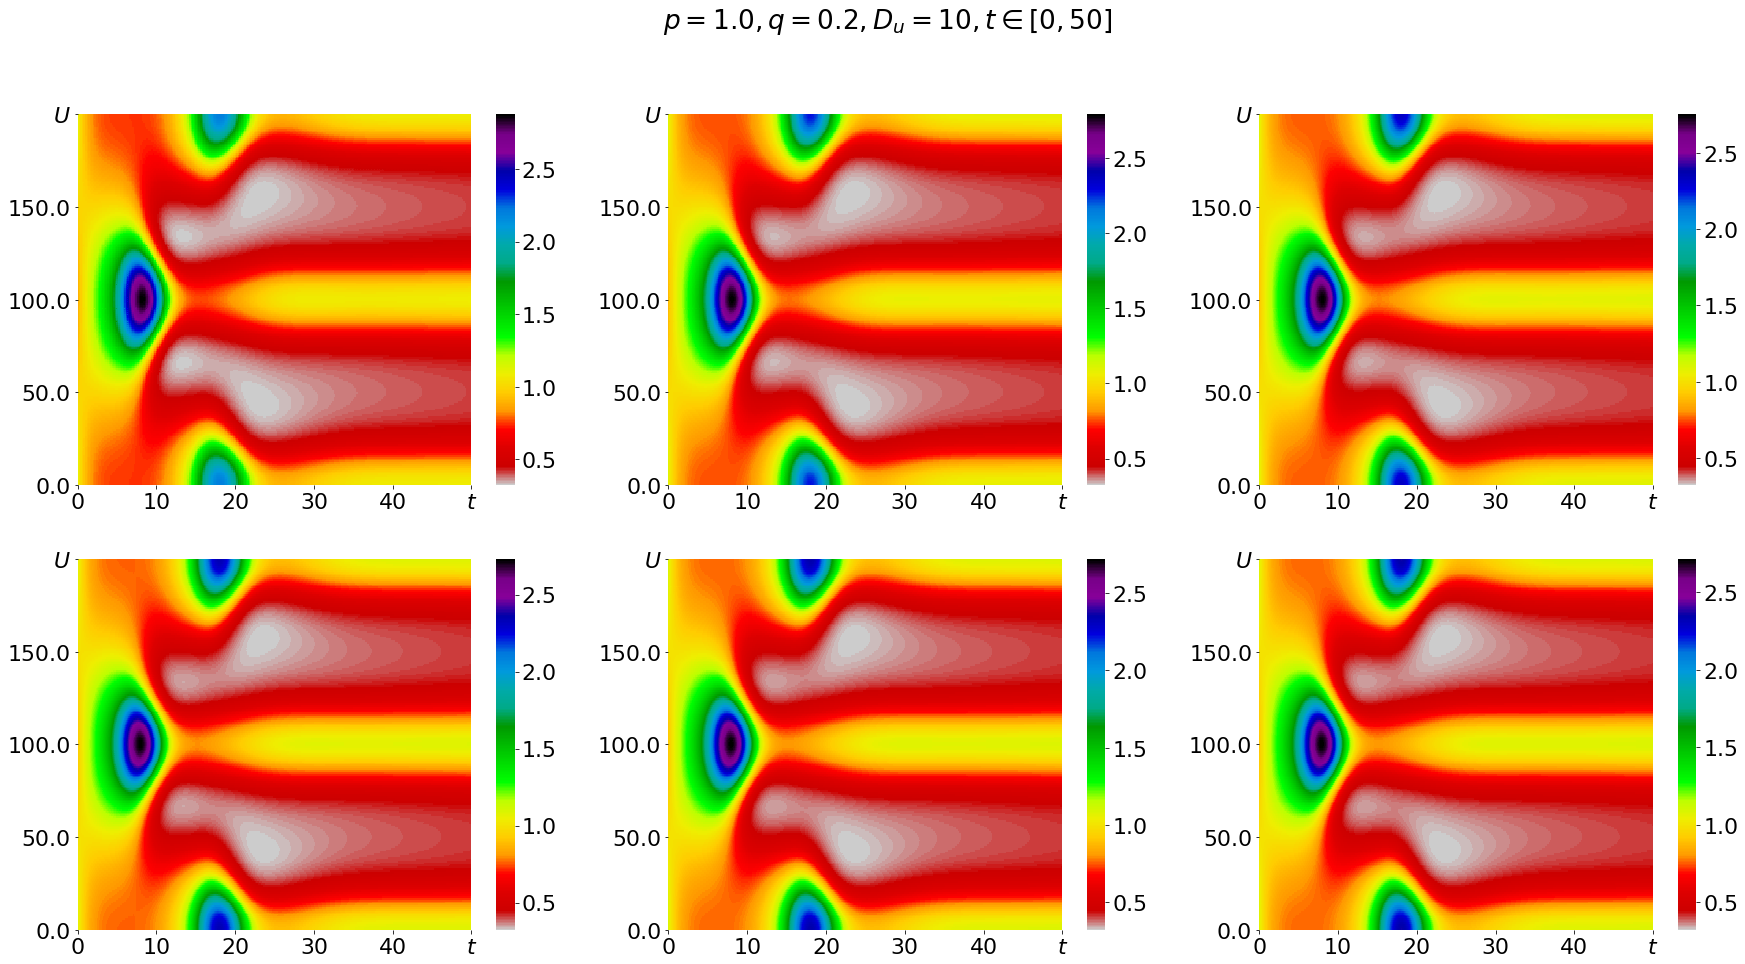

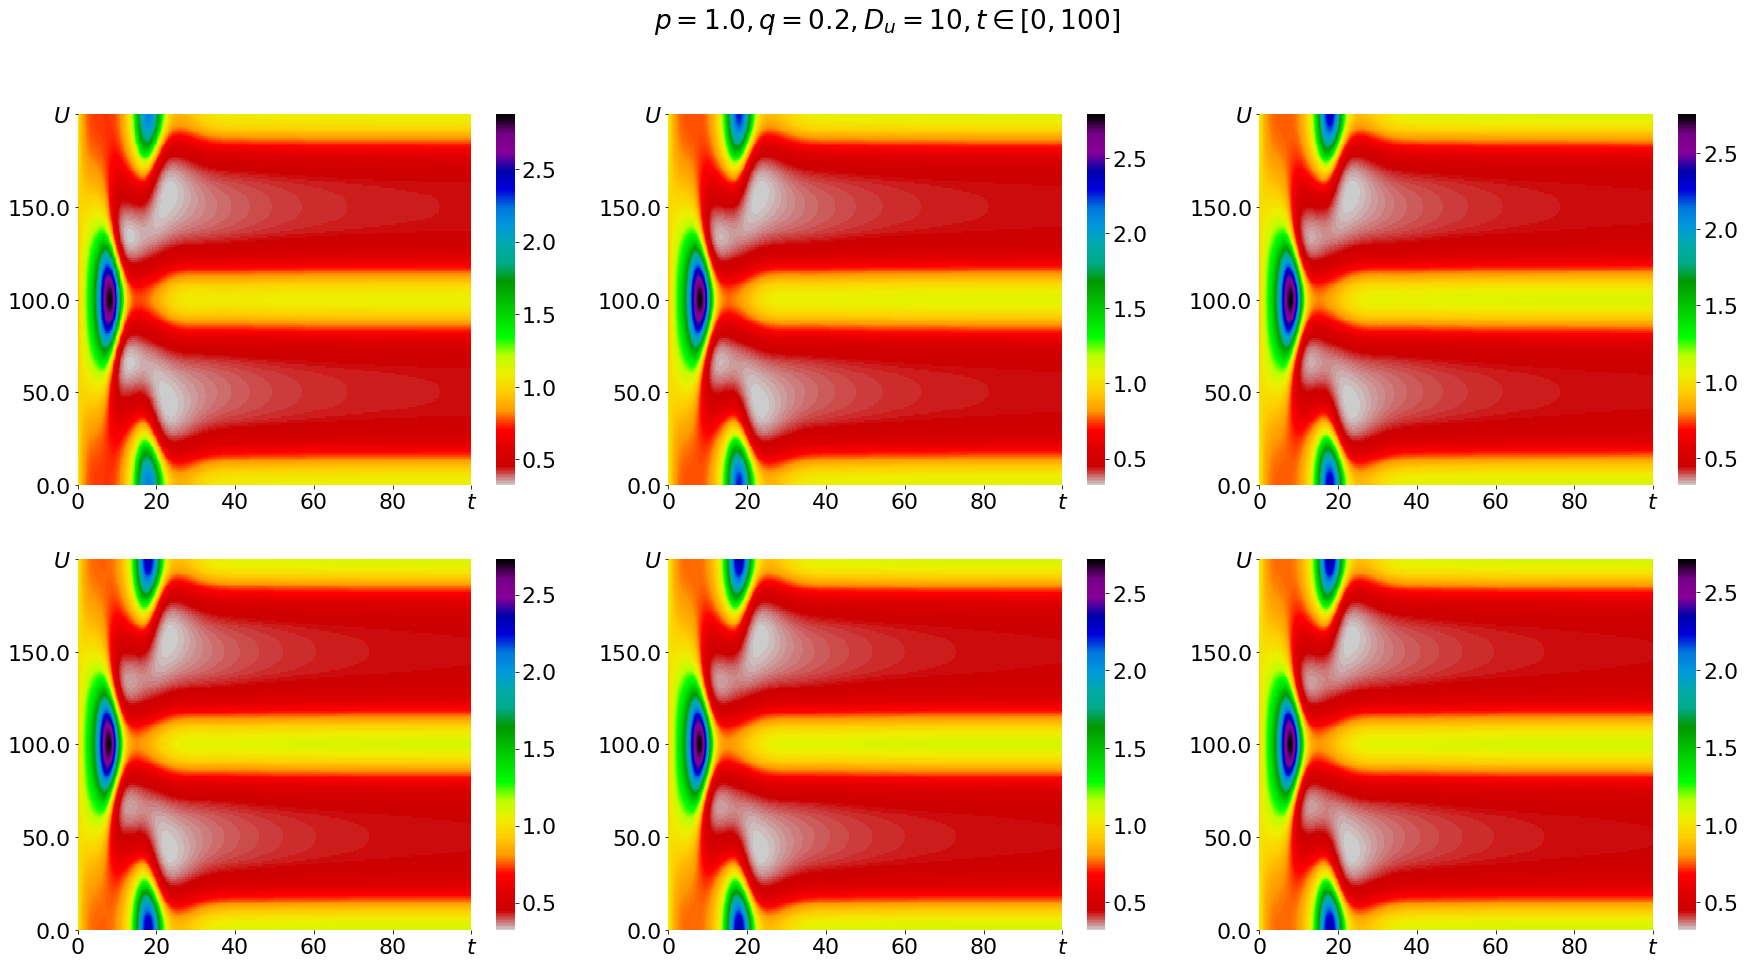

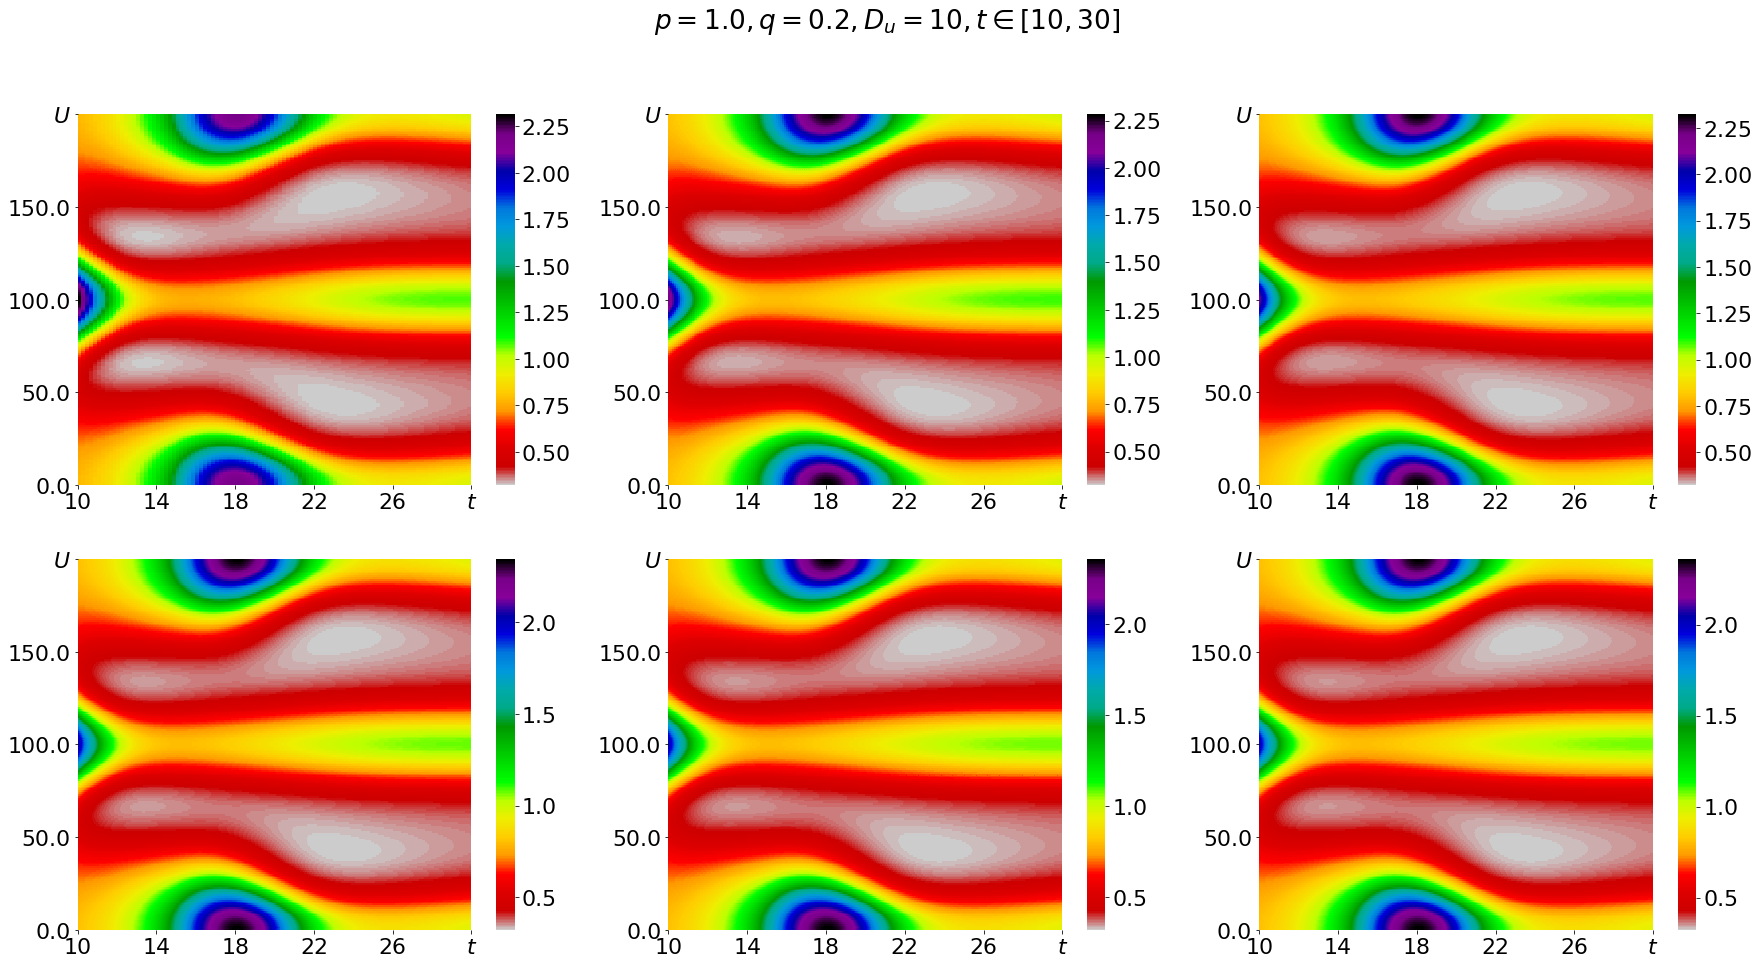

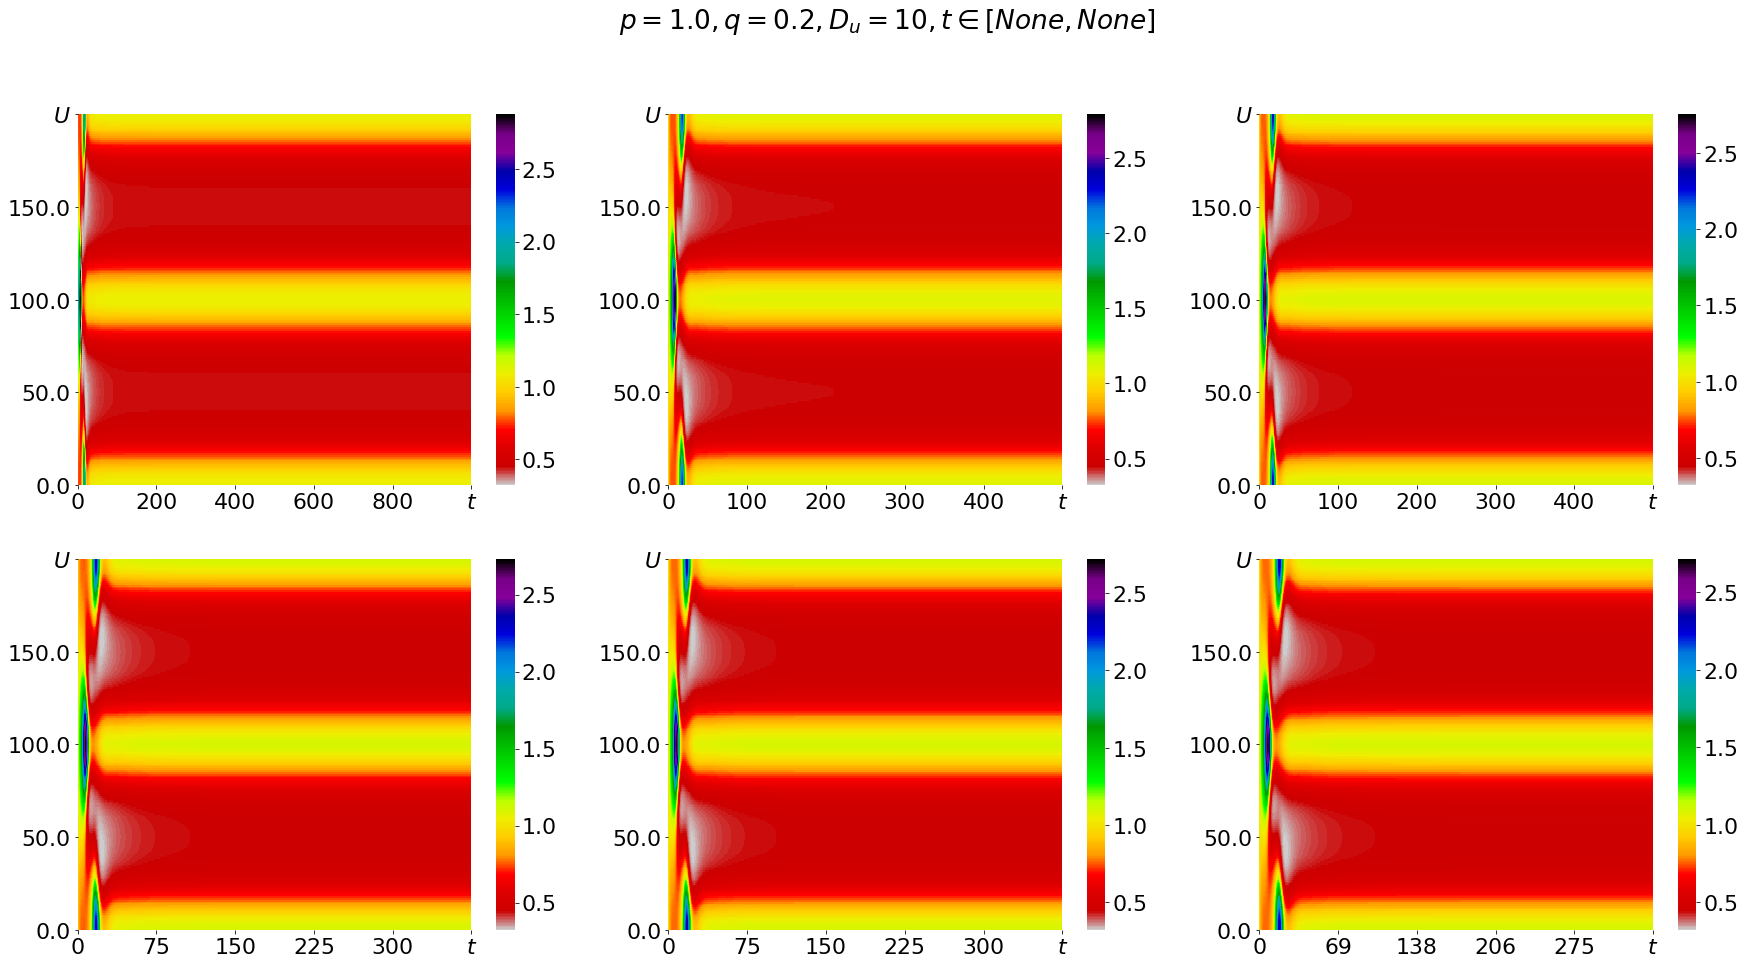

In [8]:
draw_sas(results_1, left_border=0, right_border=50)
draw_sas(results_1, left_border=0, right_border=100)
draw_sas(results_1, left_border=10, right_border=30)
draw_sas(results_1)

In [9]:
results_2 = {}
for dx in tqdm([0.2, 0.1, 0.05,0.025]):
    conf = Higgins1DConfiguration(2.0, 2.0, 16.5, 1)
    u_init = get_cos(1, int(200*(0.2/dx)),1.0, 0.1)
    v_init = get_cos(1, int(200*(0.2/dx)),1.0, 0.1)
    print(u_init.shape[0]*dx)
    params = Higgins1DTdmaParameters(u_init, v_init, dx, 0.1, 5000.0, save_timeline=True, timeline_save_step_delta=1)
    results_2[dx] = integrate_tdma_implicit_scheme(conf, params)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

40.0


 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  2.24it/s]

40.0


 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:01,  1.39it/s]

40.0


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:03<00:01,  1.11s/it]

40.0


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.97s/it]


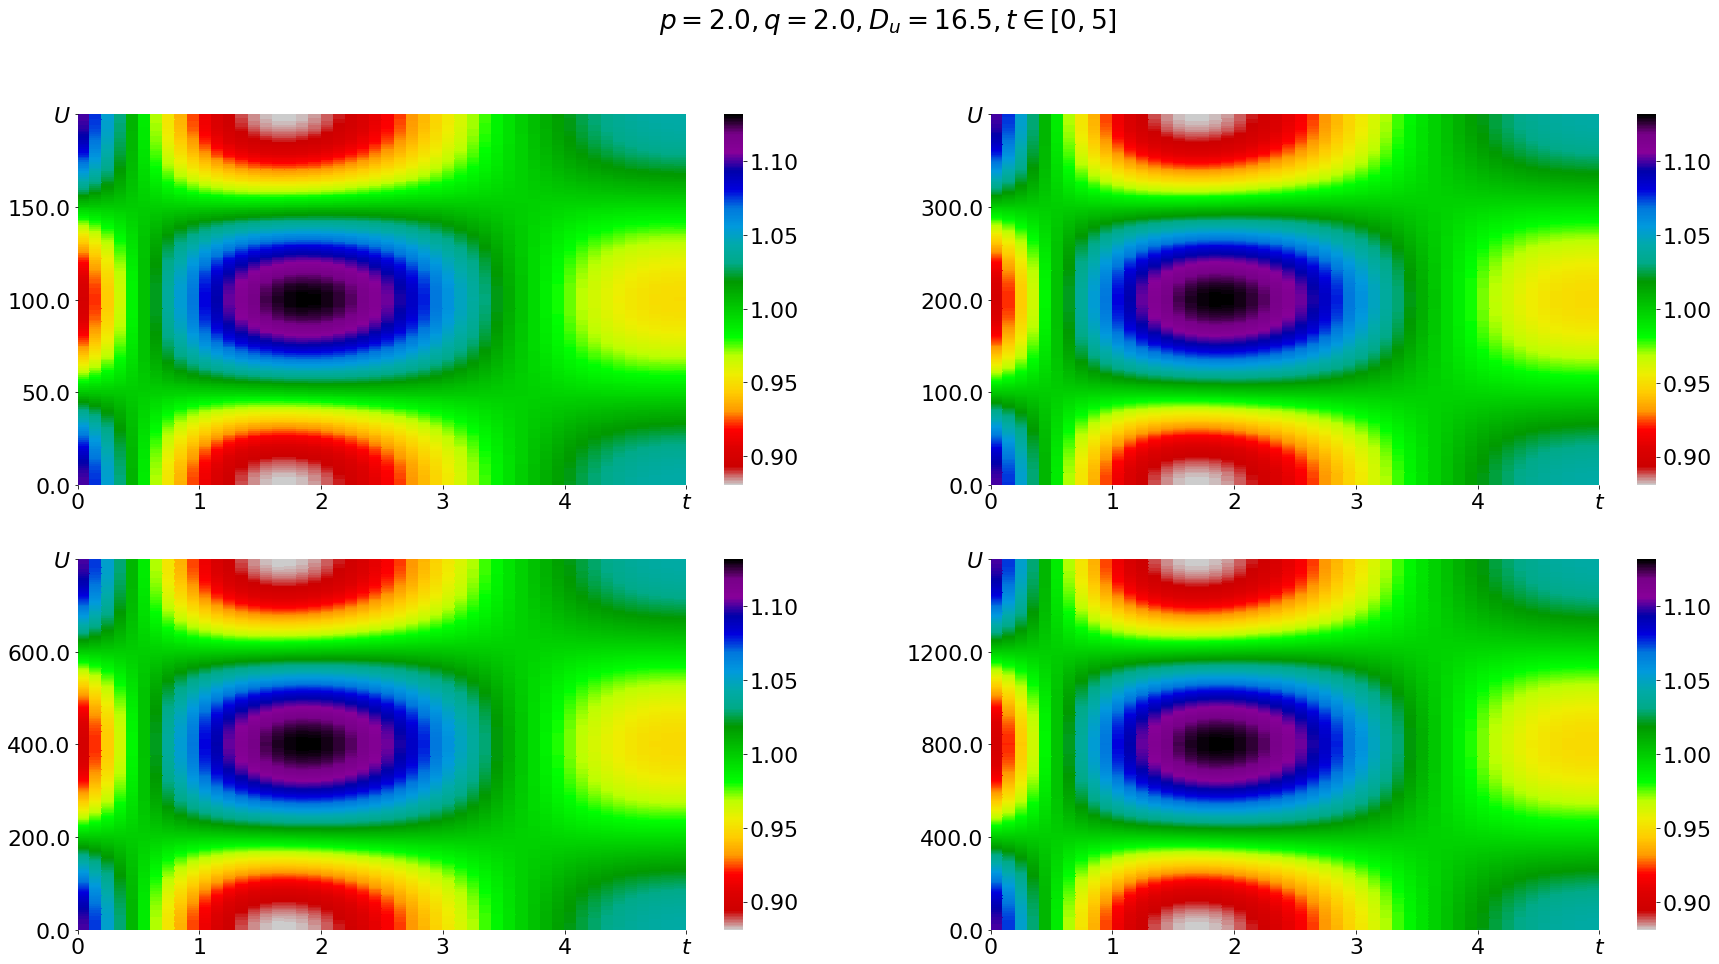

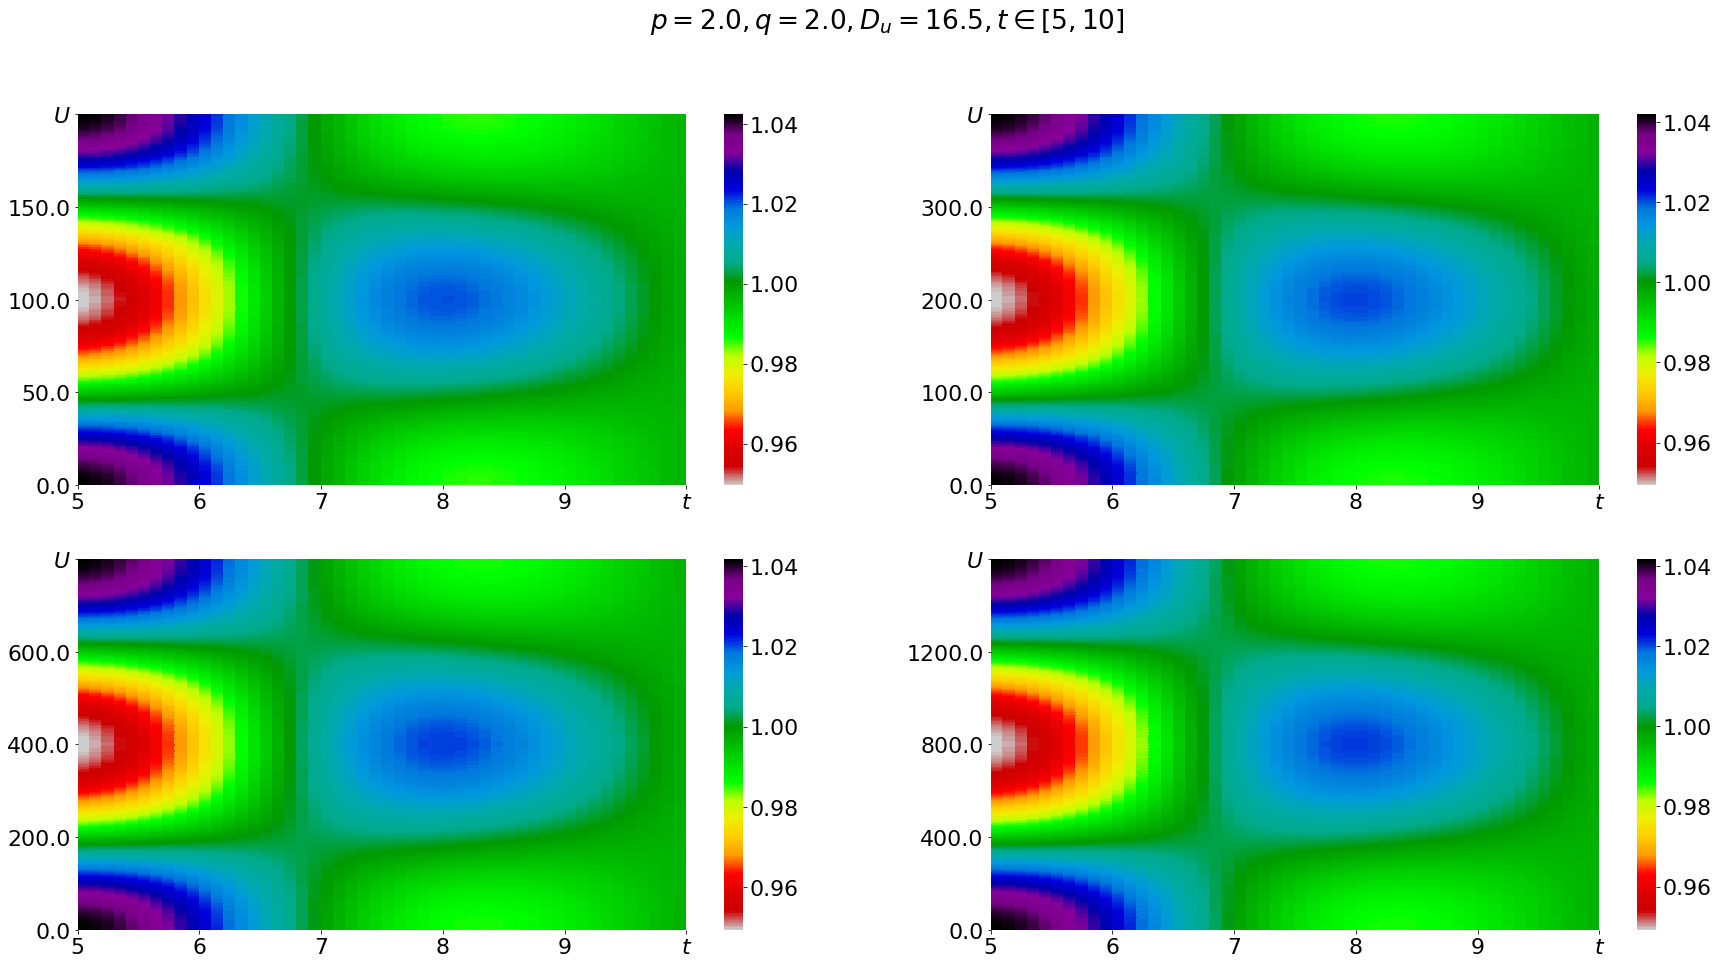

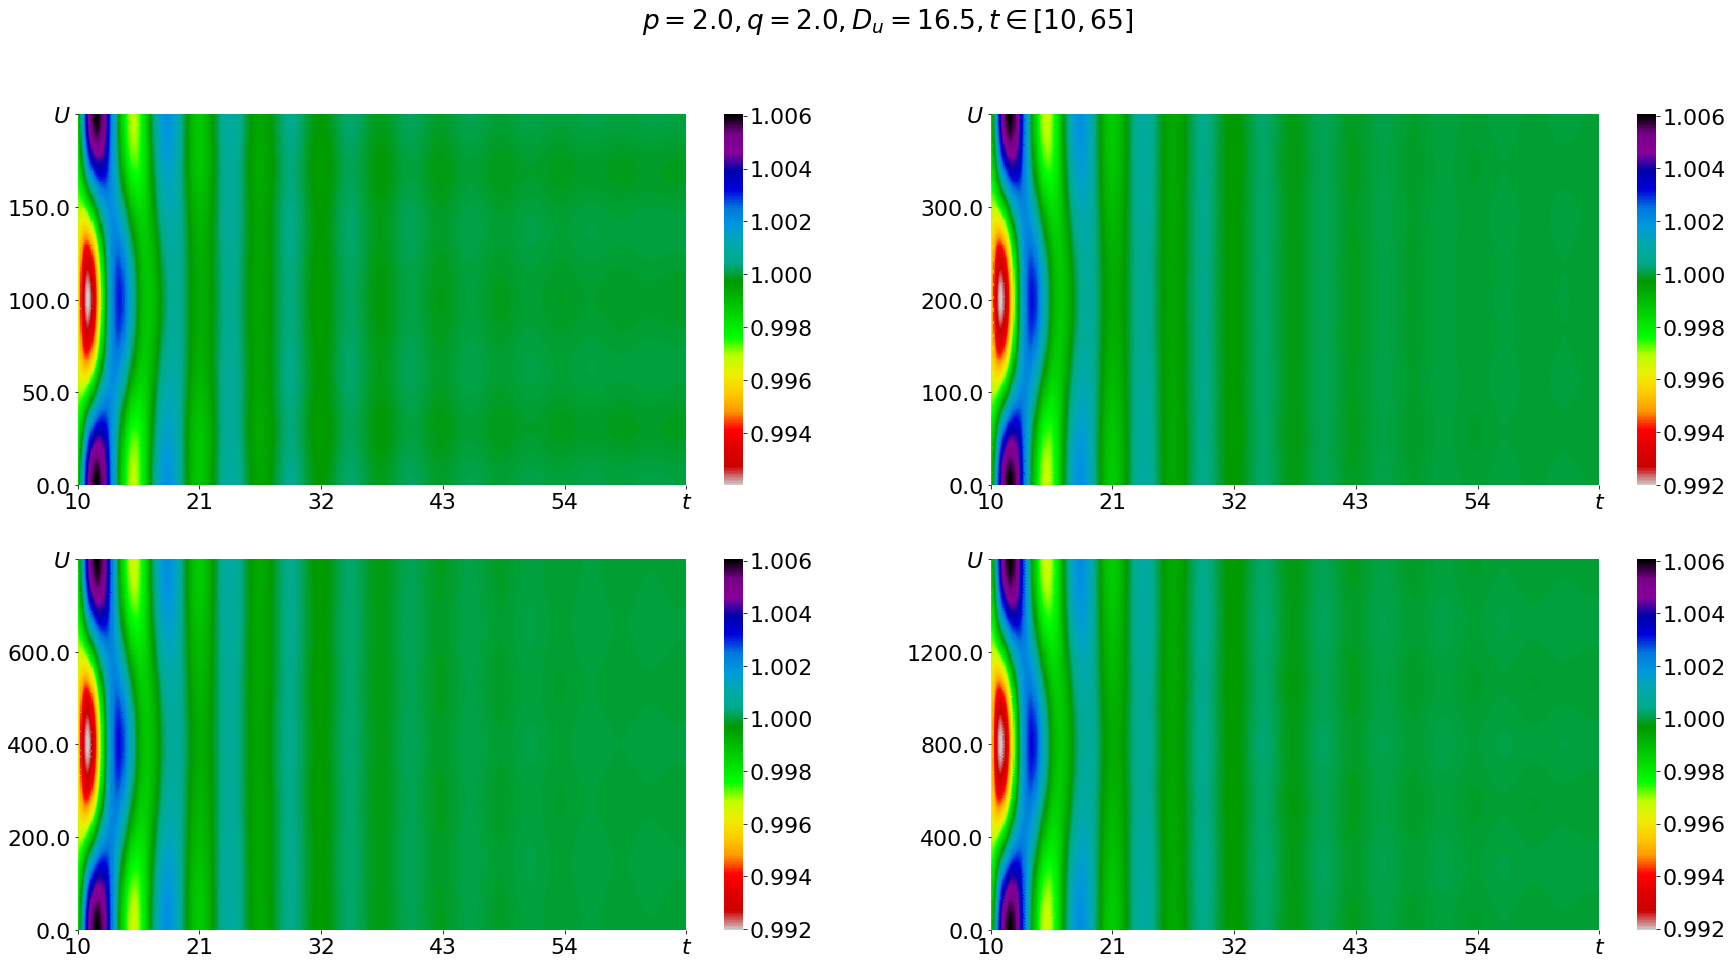

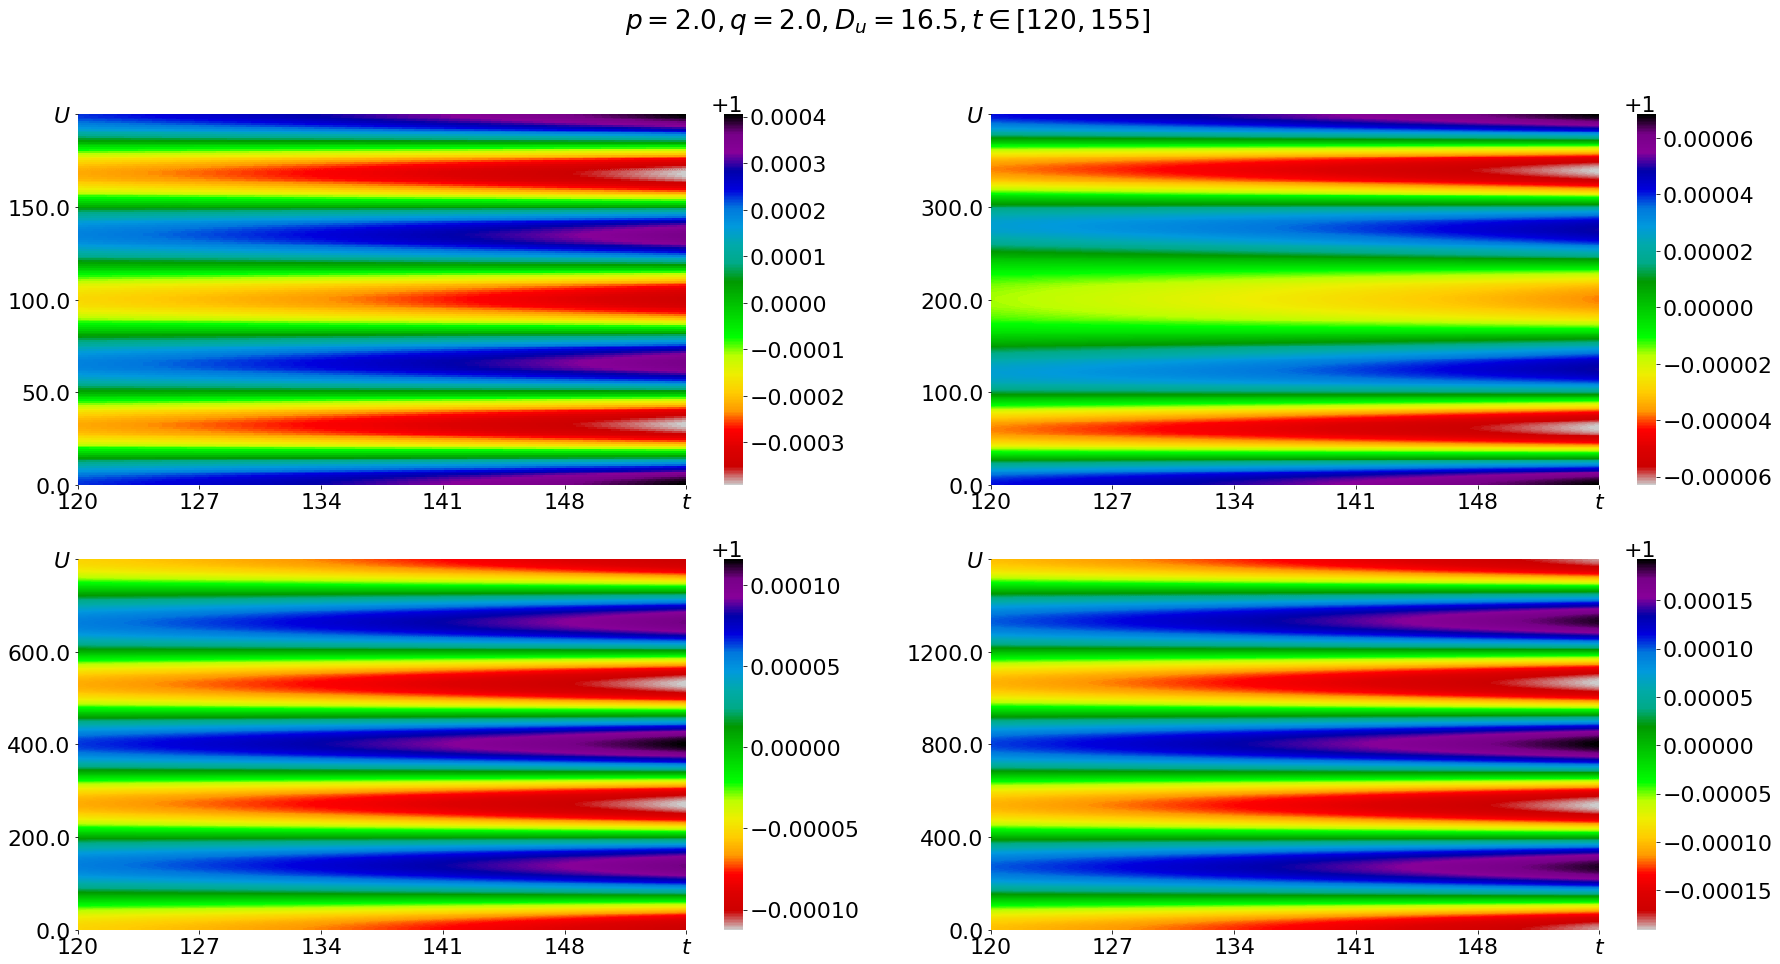

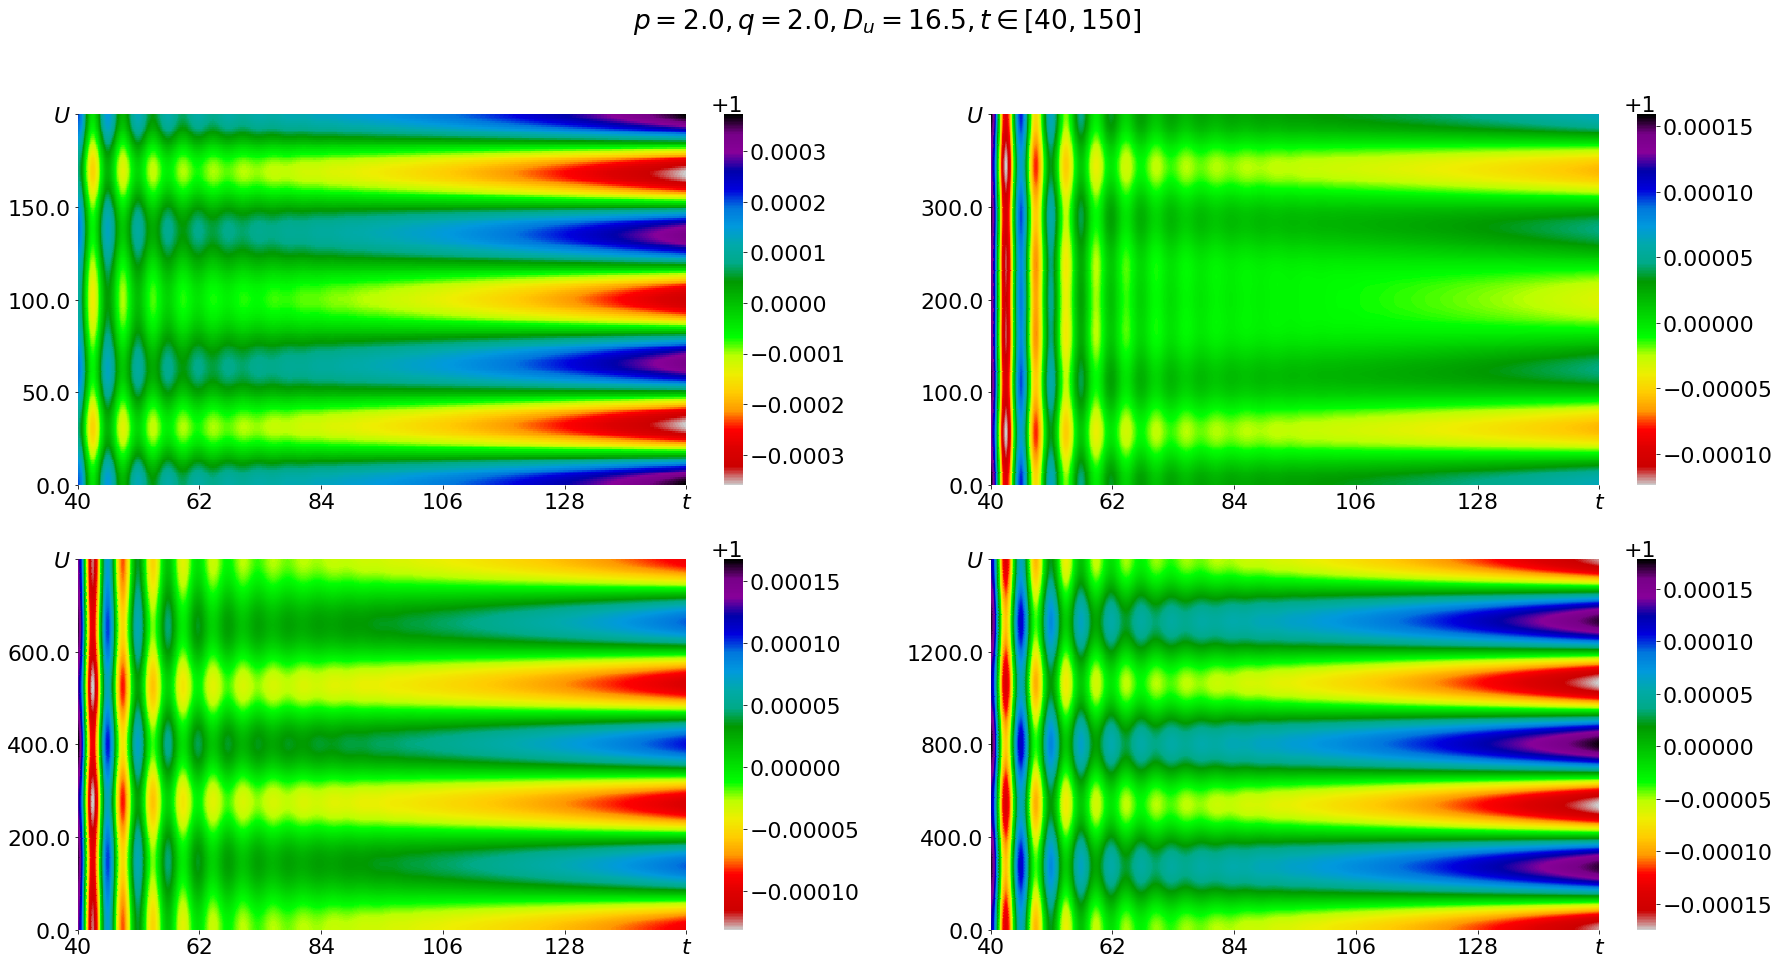

In [10]:
draw_sas(results_2, left_border=0, right_border=5,w=2,h=2)
draw_sas(results_2, left_border=5, right_border=10,w=2,h=2)
draw_sas(results_2, left_border=10, right_border=65,w=2,h=2)
draw_sas(results_2, left_border=120, right_border=155,w=2,h=2)
draw_sas(results_2, left_border=40, right_border=150,w=2,h=2)
